# Classic PINN

Let's solve an inverse PINN problem. The purpose of this notebook is to show that mathematical solutions can be discovered but they are not a physical solution. This can be seen in the results:

- we succesfully recover u(x,t)
- we do not recover alpha(x)

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "")))

import torch
from src.data_generator.heat_equations import HeatEquationDataset
from src.train.train import train
from src.figures.figures import plot_sample, plot_physical_property
from src.models.basic import alpha_network, u_network
from src.loss_function.loss_function import Loss


# For PyTorch random
torch.manual_seed(45)

# Create Dataset
dataset = HeatEquationDataset(n_samples=1, nx=100, nt=100,T=100, L=1)

# Define PINNS
alpha_net = alpha_network()
u_net = u_network()

# training
u_net.train()
alpha_net.train()

lr = 1e-2
optimizer = torch.optim.Adam(list(u_net.parameters()) + list(alpha_net.parameters()), lr=lr)
loss = Loss()
train(
    loss_function=loss,
    optimizer=optimizer,
    dataset=dataset,
    u_net=u_net,
    alpha_net=alpha_net,
    epochs=3000
)


Epoch 0: Loss = 2.0904e-01
Epoch 20: Loss = 9.1518e-02
Epoch 40: Loss = 7.4331e-02
Epoch 60: Loss = 6.6730e-02
Epoch 80: Loss = 6.4701e-02
Epoch 100: Loss = 6.3984e-02
Epoch 120: Loss = 6.3690e-02
Epoch 140: Loss = 6.3544e-02
Epoch 160: Loss = 6.3459e-02
Epoch 180: Loss = 6.3401e-02
Epoch 200: Loss = 6.3358e-02
Epoch 220: Loss = 6.3325e-02
Epoch 240: Loss = 6.3299e-02
Epoch 260: Loss = 6.3273e-02
Epoch 280: Loss = 6.3278e-02
Epoch 300: Loss = 6.3249e-02
Epoch 320: Loss = 6.3222e-02
Epoch 340: Loss = 6.2699e-02
Epoch 360: Loss = 6.1572e-02
Epoch 380: Loss = 5.6307e-02
Epoch 400: Loss = 4.7233e-02
Epoch 420: Loss = 3.4989e-02
Epoch 440: Loss = 2.4751e-02
Epoch 460: Loss = 1.9793e-02
Epoch 480: Loss = 1.4421e-02
Epoch 500: Loss = 1.2352e-02
Epoch 520: Loss = 1.0287e-02
Epoch 540: Loss = 1.1447e-02
Epoch 560: Loss = 8.5981e-03
Epoch 580: Loss = 8.6508e-03
Epoch 600: Loss = 7.9666e-03
Epoch 620: Loss = 7.4941e-02
Epoch 640: Loss = 1.3096e-02
Epoch 660: Loss = 7.8485e-03
Epoch 680: Loss = 6.

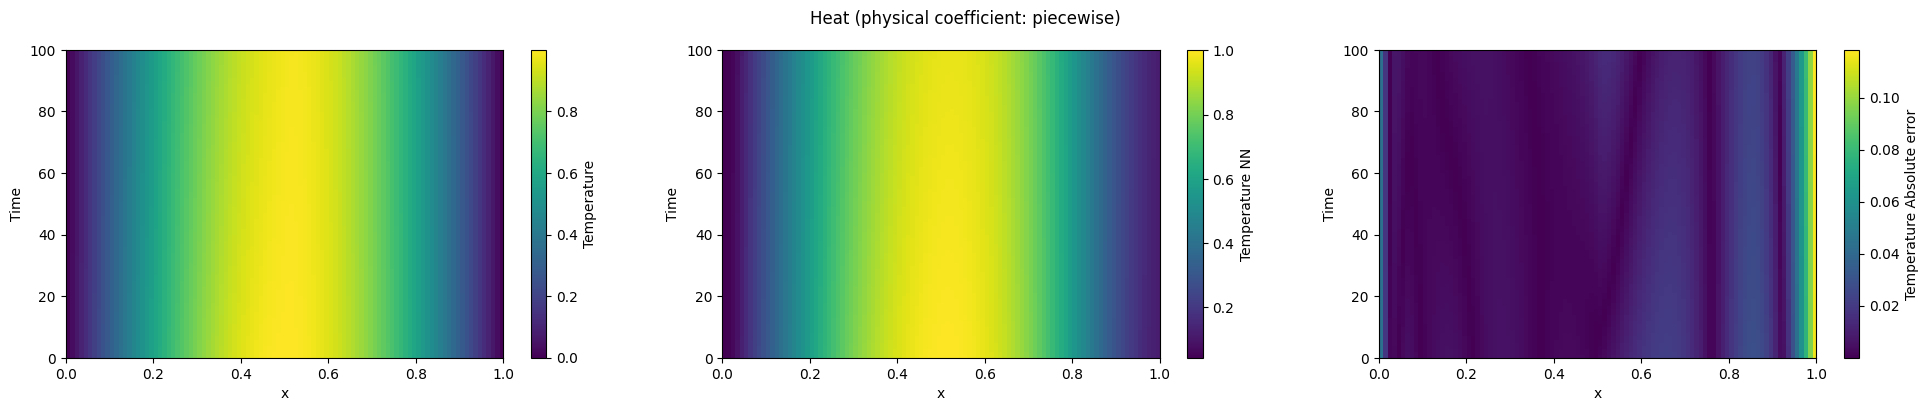

In [2]:
u_net.eval()
alpha_net.eval()
sample = dataset[0]

u_xt = u_net(xt=sample['xt'])
plot_sample(sample, u_xt, xt_pred_mesh=sample)

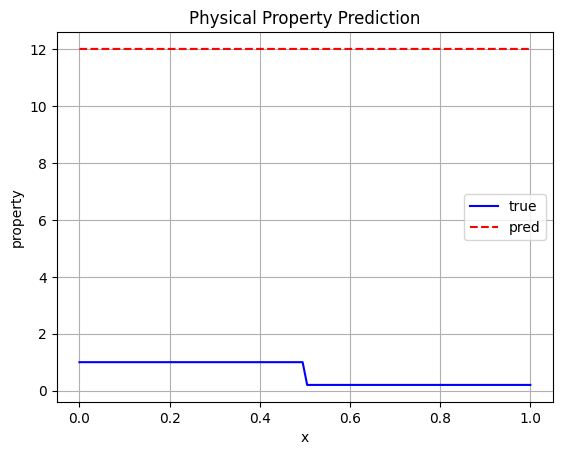

In [3]:
x = sample['x'].detach().numpy()[:,0]
property_pred = alpha_net(x=sample['x']).detach().numpy()[:,0]
property_true = sample["alpha"].detach().numpy()

plot_physical_property(x=x, property_pred=property_pred, property_true=property_true)